## Milage Prediction - Regression Analysis

Objective- To Predict the Mileage by regression analysis of the datasett

Source:

This dataset was taken from Statlib library which is maintained at CCarnegie Mellon University. The dataset was used in the 1983 American Statiscal Association Exposition.

#Import Library

In [17]:
import pandas as pd

In [18]:
import numpy as np

In [19]:
import matplotlib.pyplot as plt

In [20]:
import seaborn as sns

#Import Data

In [16]:
df = pd.read_csv('https://github.com/YBI-Foundation/Dataset/raw/refs/heads/main/MPG.csv')

In [22]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [24]:
df.nunique()

,0
mpg,129
cylinders,5
displacement,82
horsepower,93
weight,351
acceleration,95
model_year,13
origin,3
name,305


#Data Processing

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [28]:
df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


#Removing Missing Values

In [31]:
df = df.dropna()

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 392 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   model_year    392 non-null    int64  
 7   origin        392 non-null    object 
 8   name          392 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 30.6+ KB


#Data Visualization

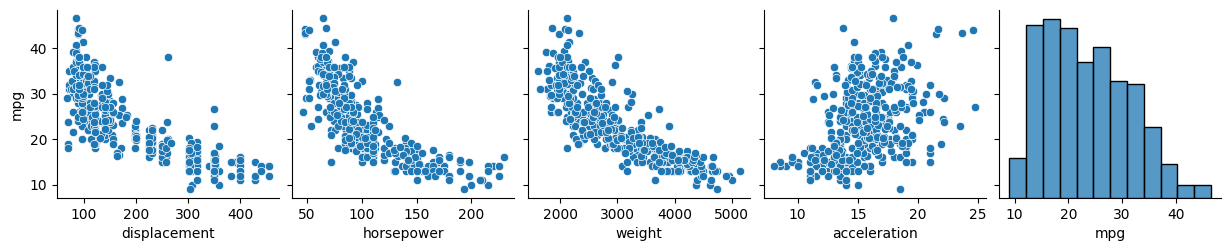

In [33]:
sns.pairplot(df, x_vars=['displacement', 'horsepower', 'weight', 'acceleration', 'mpg'], y_vars=['mpg']);

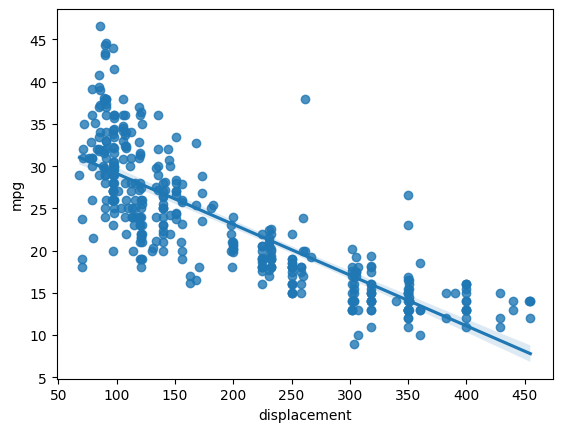

In [34]:
sns.regplot(x='displacement', y='mpg', data=df);

#Define Target Variable y and Feature X

In [36]:
df.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model_year', 'origin', 'name'],
      dtype='object')

In [37]:
y = df['mpg']

In [38]:
y.shape

(392,)

In [39]:
X = df[['displacement', 'horsepower', 'weight', 'acceleration']]

In [40]:
X.shape

(392, 4)

In [41]:
X

,displacement,horsepower,weight,acceleration
0,307.0,130.0,3504,12.0
1,350.0,165.0,3693,11.5
2,318.0,150.0,3436,11.0
3,304.0,150.0,3433,12.0
4,302.0,140.0,3449,10.5
...,...,...,...,...
393,140.0,86.0,2790,15.6
394,97.0,52.0,2130,24.6
395,135.0,84.0,2295,11.6
396,120.0,79.0,2625,18.6


#Scaling Data

In [43]:
from sklearn.preprocessing import StandardScalermb

In [44]:
ss = StandardScaler()

In [48]:
X = ss.fit_transform(X)

In [47]:
X

array([[ 1.07728956,  0.66413273,  0.62054034, -1.285258  ],
       [ 1.48873169,  1.57459447,  0.84333403, -1.46672362],
       [ 1.1825422 ,  1.18439658,  0.54038176, -1.64818924],
       ...,
       [-0.56847897, -0.53247413, -0.80463202, -1.4304305 ],
       [-0.7120053 , -0.66254009, -0.41562716,  1.11008813],
       [-0.72157372, -0.58450051, -0.30364091,  1.40043312]])

In [50]:
pd.DataFrame(X).describe()

,0,1,2,3
count,392.000000,3.920000e+02,3.920000e+02,3.920000e+02
mean,0.000000,1.812609e-17,-1.812609e-17,-1.812609e-17
std,1.001278,1.001278e+00,1.001278e+00,1.001278e+00
min,-1.209563,-1.520975e+00,-1.608575e+00,-2.736983e+00
25%,-0.855532,-7.665929e-01,-8.868535e-01,-6.410551e-01
50%,-0.415384,-2.853488e-01,-2.052109e-01,-1.499869e-02
75%,0.778276,5.600800e-01,7.510927e-01,5.384714e-01
max,2.493416,3.265452e+00,2.549061e+00,3.360262e+00


After Standardization Mean is Zero and Standard Deviation is One

#Train Test Split Data

In [51]:
from sklearn.model_selection import train_test_split

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.7, random_state=2529)

In [53]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((117, 4), (275, 4), (117,), (275,))

#Linear Regresssion Model

In [54]:
from sklearn.linear_model import LinearRegression

In [55]:
lr = LinearRegression()

In [56]:
lr.fit(X_train, y_train)

LinearRegression()

In [57]:
lr.intercept_

23.601118059983822

In [58]:
lr.coef_

array([-1.07085922, -0.64133484, -5.18021642,  0.26756035])

Mileage=23.6011, -1.07Displacement,-0.641HorsePower,-5.1802Weight,0.2675Acceleration + error

#Predict Test Data

In [59]:
y_pred = lr.predict(X_test)

In [60]:
y_pred

array([18.83232615, 14.67689764, 13.90916105, 23.48706843, 30.25543552,
       23.46671071, 27.28163576, 24.60121655, 14.40764431, 10.81692289,
       24.30874146, 27.9134718 , 31.87135668, 31.42289874, 17.69562279,
       19.09989244, 28.60563403, 32.67685665, 31.45063299, 27.35959705,
       18.46314382, 22.19920123, 26.2982957 , 33.03335117, 20.48801313,
        9.54351607, 22.40016431, 18.3349025 , 24.90567933, 17.72005616,
       23.00135022, 16.88953804, 10.57530881, 30.26775706, 20.13255834,
       29.29639211, 24.89285218, 21.37238187,  9.68643504, 12.73666785,
       20.95618571, 20.11237202,  6.42862798, 17.31748152, 22.17367358,
       29.47288305, 13.72946495, 25.84603835, 30.3260242 , 22.49617884,
       21.32125793, 16.21218023, 23.82532354, 30.39683971,  9.25868474,
       10.87274956, 28.51433586, 23.14656115, 20.00708585, 31.00621369,
       20.4572209 , 27.13086597, 22.2195037 , 13.80505274, 25.30799492,
       27.41913866, 15.02111221, 24.0510285 , 31.58339665, 14.71

#Model Accuracy

In [61]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, r2_score

In [62]:
mean_absolute_error(y_test, y_pred)

3.3564087099398776

In [63]:
mean_absolute_percentage_error(y_test, y_pred)

0.14970671967399587

In [64]:
r2_score(y_test, y_pred)

0.6923289624942408

#Polynomaial Regression

In [69]:
from sklearn.preprocessing import PolynomialFeatures

In [72]:
poly = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)

In [73]:
X_train2 = poly.fit_transform(X_train)

In [74]:
X_test2 = poly.fit_transform(X_test)

In [75]:
lr.fit(X_train2, y_train)

LinearRegression()

In [76]:
lr.intercept_

21.55533901604716

In [77]:
lr.coef_

array([-2.2748814 , -3.73899676, -2.6609481 ,  0.24305983,  2.0800206 ,
       -0.80160787, -3.04666232,  2.11059861,  1.49729576,  2.93749665])

In [78]:
y_pred_poly = lr.predict(X_test2)

#Model Accuracy

In [79]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, r2_score

In [80]:
mean_absolute_error(y_test, y_pred_poly)

3.2054940687439943

In [81]:
mean_absolute_percentage_error(y_test, y_pred_poly)

0.14706619052559172

In [82]:
r2_score(y_test, y_pred_poly)

0.6842004879324939